## 패키지 import

In [1]:
import tensorflow as tf
# from tensorflow.examples.tutorials.mnist import input_data 
# 텐서플로우 1버전에서 사용하는 방법

In [2]:
import sys
import numpy as np
# 이미지 형태 출력을 위한 pyplot 모듈 import
import matplotlib.pyplot as plt

## MNIST data set import

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 데이터 전처리

In [5]:
# normalization
x_train, x_test = x_train/255.0, x_test/255.0

## 모델 구성

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## 데이터 시각화

Image Shape :  (28, 28)
Image Label :  5


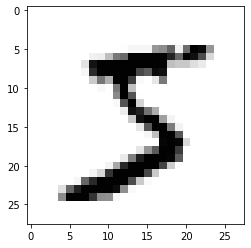

In [7]:
# 0번째 원소의 정보 출력
print("Image Shape : ", x_train[0].shape)
print("Image Label : ", y_train[0])

# 0번째 원소를 흑백으로 출력
plt.imshow(x_train[0].reshape(28, 28), cmap='Greys')
plt.show()

In [8]:
print(x_train.shape)

(60000, 28, 28)


## 모델 구성

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## 모델 컴파일

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## 모델 요약

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


## 모델 훈련

In [12]:
with(tf.device("device:GPU:0")):
    history = model.fit(x_train, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
1688/1688 [==============================] - 7s 3ms/step - loss: 0.2052 - accuracy: 0.9373 - val_loss: 0.1075 - val_accuracy: 0.9670
Epoch 2/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0904 - accuracy: 0.9718 - val_loss: 0.0869 - val_accuracy: 0.9735
Epoch 3/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0647 - accuracy: 0.9798 - val_loss: 0.0801 - val_accuracy: 0.9783
Epoch 4/5
1587/1688 [===========================>..] - ETA: 0s - loss: 0.0494 - accuracy: 0.9843

## 훈련 과정 확인

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


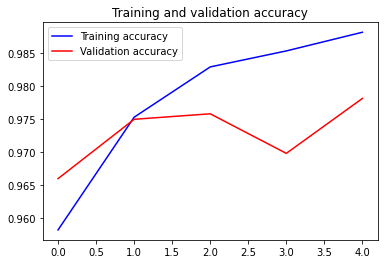

In [ ]:
print(history.history.keys())
train_accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(list(range(5)), train_accuracy, 'b', label='Training accuracy')
plt.plot(list(range(5)), val_accuracy, 'r', label='Validation accuracy')
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

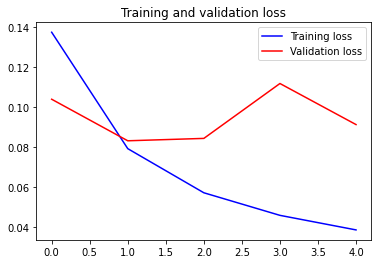

In [ ]:
plt.figure()
plt.plot(list(range(5)), train_loss, 'b', label='Training loss')
plt.plot(list(range(5)), val_loss, 'r', label='Validation loss')
plt.title("Training and validation loss")
plt.legend()
plt.show()

## 모델 평가

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy : ", test_acc)

 9728/10000 [============================>.] - ETA: 0sAccuracy :  0.9759


## 결과 확인

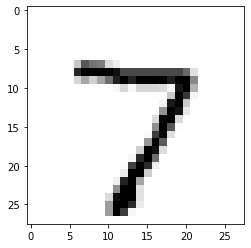

ValueError: Error when checking : expected flatten_2_input to have 3 dimensions, but got array with shape (1, 28, 28, 1)

In [ ]:
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
plt.show()
print("The predictions are ", model.predict(x_test[n].reshape((1,28,28,1))))
print("The answer is ", np.argmax(model.predict(x_test[n].reshape((1,28,28,1)))))